In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **1- Importing Required Libraries**

In [91]:
#deep-learning libraries
import torchvision
from torchvision import  transforms 
import torch
from torch import no_grad

#libraries for image processing and visualization
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

<div style="background-color: green; padding: 10px; border-radius: 10px; ">
<font size="3px" color="white">
<hr style="color: red;">
this function will speed up your code by freeing memory. 
<hr style="color: red;">
</font>
</div>

In [92]:
def save_RAM(image_=False):
    global image, img, pred
    torch.cuda.empty_cache()
    del(img)
    del(pred)
    if image_:
        image.close()
        del(image)

# **2- Load Pre-trained Faster R-CNN**

<div style="background-color: green; padding: 10px; border-radius: 10px; ">
<font size="3px" color="white">
<hr style="color: red;">
Faster R-CNN is a model that predicts both bounding boxes and class scores for potential objects in the image pre-trained on COCO. 
<hr style="color: red;">
</font>
</div>

In [93]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_.eval()

for name, param in model_.named_parameters():
    param.requires_grad = False
print("done")

done


<div style="background-color: green; padding: 10px; border-radius: 10px; ">
<font size="3px" color="white">
<hr style="color: red;">
the function calls Faster R-CNN  model_ but save RAM: 
<hr style="color: red;">
</font>
</div>

In [94]:
def model(x):
    with torch.no_grad():
        yhat = model_(x)
    return yhat

<div style="background-color: green; padding: 10px; border-radius: 10px; ">
<font size="3px" color="white">
<hr style="color: red;">
Here are the 91 classes. 
<hr style="color: red;">
</font>
</div>

In [95]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
len(COCO_INSTANCE_CATEGORY_NAMES)

91

# **3- Object Localization**

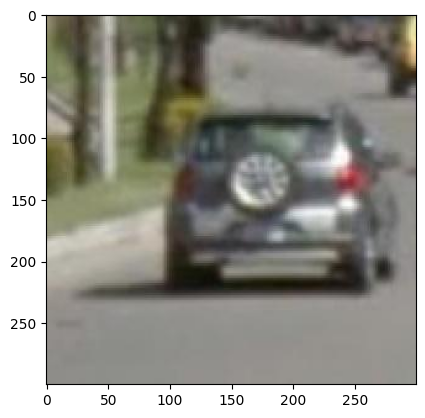

In [96]:
img_path='/kaggle/input/26-class-object-detection-dataset/Senior-Design-VIAD-4/train/-0C60C602-CF70-4679-BB4E-5A1CA33EF472-png_jpg.rf.59117f65dff751a9994d1b0338f7d21e.jpg'
half = 0.5
image = Image.open(img_path)

image.resize( [int(half * s) for s in image.size] )

plt.imshow(image)
plt.show()

<div style="background-color: green; padding: 10px; border-radius: 10px; ">
<font size="3px" color="white">
<hr style="color: red;">
We will create a transform object to convert the image to a tensor.
<hr style="color: red;">
</font>
</div>

In [97]:
transform = transforms.Compose([transforms.ToTensor()])
img = transform(image) #We convert the image to a tensor.

<div style="background-color: green; padding: 10px; border-radius: 10px; ">
<font size="3px" color="white">
<hr style="color: red;">
we can make a prediction,The output is a dictionary with several predicted classes, the probability of belonging to that class and the coordinates of the bounding box corresponding to that class. 
<hr style="color: red;">
</font>
</div>

In [98]:
pred = model([img])

<div style="background-color: green; padding: 10px; border-radius: 10px; ">
<font size="3px" color="white">
<hr style="color: red;">
The class number corresponds to the index of the list with the corresponding category name 
<hr style="color: red;">
</font>
</div>

In [99]:
index=pred[0]['labels'][0].item()
label = COCO_INSTANCE_CATEGORY_NAMES[index]

<div style="background-color: green; padding: 10px; border-radius: 10px; ">
<font size="3px" color="white">
<hr style="color: red;">
we have the coordinates of the bounding box
<hr style="color: red;">
</font>
</div>

In [100]:
bounding_box=pred[0]['boxes'][0].tolist()
t,l,r,b=[round(x) for x in bounding_box]

<div style="background-color: green; padding: 10px; border-radius: 10px; ">
<font size="3px" color="white">
<hr style="color: red;">
We convert the tensor to an open CV array and plot an image with the box:
<hr style="color: red;">
</font>
</div>

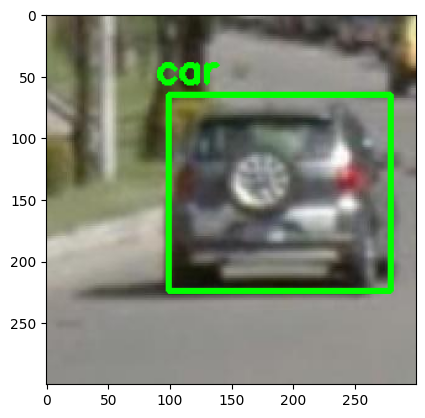

In [101]:
img_plot=(np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)),0,1), cv2.COLOR_RGB2BGR),0,1)*255).astype(np.uint8)
cv2.rectangle(img_plot,(t,l),(r,b),(0, 255, 0), 3) # Draw Rectangle with the coordinates
cv2.putText(img_plot,label, (t-10,l-10),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),thickness=3)

plt.imshow(cv2.cvtColor(img_plot, cv2.COLOR_BGR2RGB))
plt.show()
del img_plot, t, l, r, b

<div style="background-color: red; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
If my notebook was useful for you, please give me a upvote. Thank you for your support ❤️
    <hr style="color: green;"></font>
    <font size="5px">
         <a href="https://github.com/omid-sakaki-ghazvini">Github</a>
        <br/>
        <a href="http://linkedin.com/in/omid-sakaki-ghazvini-378687217">linkedin</a> 
    </font>
</div>